# Cap 05.01<br>Classifying Stars, Galaxies and Quasars

---

### Step 1: Adding the Dataset to your notebook
* Download the dataset from [this link](https://drive.google.com/uc?id=1dVK2MgtXvrSOVBVodKhlAf0XMIa-2jGF).
* Add this data to your Notebook and know the exact location of where you have kept it.


### Step 2: Reading the CSV Data
* You can find the complete details about this data [over here](https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey/data).
* [Understanding SDSS Imagining](https://www.sdss3.org/dr10/imaging/imaging_basics.php)
* [Terminologies Explained](https://www.sdss3.org/dr10/help/glossary.php)

In [42]:
# Import Pandas to handle the csv file
import pandas as pd

In [43]:
# Storing the CSV data in pandas DataFrame
path_to_csv = 'https://raw.githubusercontent.com/MauricioRPF/Astronomy-Machine-Learning/refs/heads/main/Assets/SDSS%20Tabular%20Data.csv'
df = pd.read_csv(path_to_csv)

In [44]:
# Display first 5 rows of data from the df
df.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


**objid:** Unique identifier for an object in the Sloan Digital Sky Survey (SDSS) imaging.        
**ra:** Right ascension coordinate of the object in the SDSS imaging.        
**dec:** Declination coordinate of the object in the SDSS imaging.            
**u:** Magnitude of the object in the ultraviolet band.      
**g:** Magnitude of the object in the green band.         
**r:** Magnitude of the object in the red band.      
**i:** Magnitude of the object in the infrared band.      
**z:** Magnitude of the object in the near-infrared band.                                              
**run:** Unique identifier for a specific scan or run within the SDSS.                                            
**rerun:** Identifier for a specific rerun of the SDSS imaging.           
**camcol:** Camera column number in the SDSS imaging.           
**field:** Field number indicating the specific area within a run.                 
**specobjid:** Unique identifier for a spectroscopic object in the SDSS.               
class: Classification of the object (e.g., star, galaxy, quasar).               
**redshift:** Measure of the change in the wavelength of light emitted by an object due to its motion relative to the observer.              
**plate:** Identifier for the spectroscopic plate containing the object's spectrum.           
**mjd:** Modified Julian Date of the observation.      
**fiberid:** Identifier for the fiber used to obtain the spectrum of the object.                  

### Step 3: Exploring the Data


In [45]:
# Check the unique elements in class column
unique = df['class'].value_counts()
print(f'There are {len(unique)} unique classes in our data:- {unique}')

There are 3 unique classes in our data:- class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64


**Key Point:**
* Later, we shall also visualize the distribution of these classes in the data


In [46]:
# After checking the columns with constant values, we saw objid and rerun column had only one value in all 10000 rows
print('-'*60)
print('Rerun Column has "301" value repeated for 10,000 times:-')
print('-'*60)
print(df['rerun'].value_counts())

print()

print('-'*70)
print('Objid column has the same thing, a value repeated for 10,000 times:-')
print('-'*70)
print(df['objid'].value_counts())

------------------------------------------------------------
Rerun Column has "301" value repeated for 10,000 times:-
------------------------------------------------------------
rerun
301    10000
Name: count, dtype: int64

----------------------------------------------------------------------
Objid column has the same thing, a value repeated for 10,000 times:-
----------------------------------------------------------------------
objid
1.237650e+18    10000
Name: count, dtype: int64


**Key Points:**
* Note that we shall remove these features later while preparing the Dataset later in this notebook.
* You can keep it as well, but what's the use of showing the Model a data which is just constant? There is nothing to learn.

In [47]:
# Check the basic info about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


**Observations:-**
- There are total of 10,000 rows and 18 Columns
- There are no missing data as in all the columns, non-null values are 10,000
- The decimal values are stored as float64 type
- The integer values are sotred as int64 type
- The non-numeric data, `class` column is stored as object type
- Total memory usage of the DataFrame is about 1.4 MB

### Step 4: Creating Visualizations

In [48]:
# Using matplotlib's pyplot to create this visualization
import matplotlib.pyplot as plt

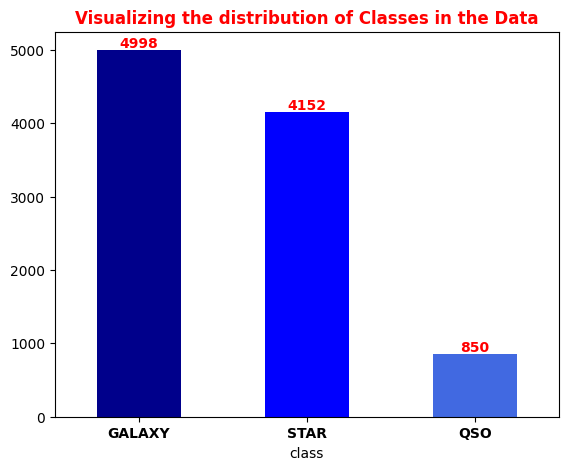

In [49]:
# Check the count of galaxy, star and qasar in our data

# Adjusting the Figure Size
plt.figure(figsize=(6.5,5))

''' We can plot directly using pandas '''
# value_counts() gives counts of unique values in the column it is used on
ax = df['class'].value_counts().plot(kind='bar', color=['darkblue', 'blue', 'royalblue'])

# Using ax (axis) to display the bar_label using containers[0] as thats where the location is of the counts
ax.bar_label(ax.containers[0], color = 'red', weight = 'bold')

# Customizing the Plot a bit more
plt.xticks(weight='bold', rotation=0)
plt.title('Visualizing the distribution of Classes in the Data', color='r', weight='bold', fontsize=12)

# Save the Figure and Display the output
plt.savefig('ClassDistribution.png') # You can download the visualization from files section (left panel)
plt.show()

**Observations:**
- We can clearly see that the Quasars (QSO: Quasi-Stellar Objects) are the least in amount as comared to Galaxies and Stars.
- Galaxy to Star Ratio is about 1:1
- Galaxy to Quasar Ratio is about 6:1

In [50]:
# Preparing 3 different DataFrames to plot the object distribution from the SDSS Data
star_df = df[df['class']=='STAR']      # Will be used to plot star data
qso_df = df[df['class']=='QSO']        # Will be used to plot quasar data
galaxy_df = df[df['class']=='GALAXY']  # Will be used to plot galaxy data

In [51]:
star_df['class'].value_counts() # Check the df

,count
class,
STAR,4152


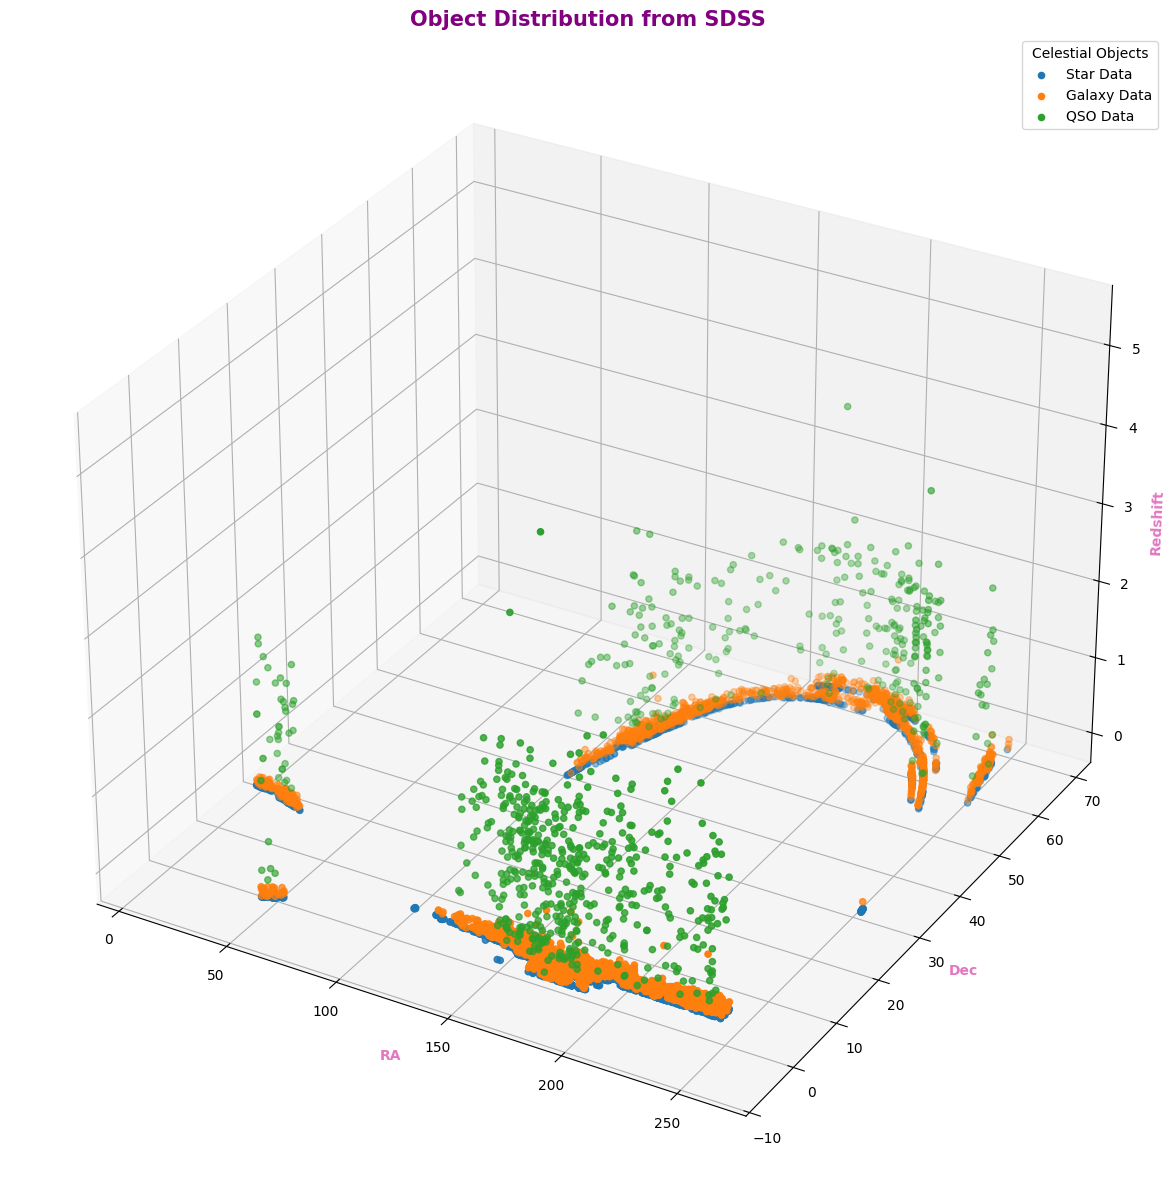

In [52]:
# Visualize the stars, galaxies and quasars data from the DataFrame

# Adjusting Figure Size and Creating a 3D Axis
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Adding 3 Scatter Plots with respect to Right Ascension, Declination and Redshift
ax.scatter(star_df['ra'], star_df['dec'], star_df['redshift'], label='Star Data')
ax.scatter(galaxy_df['ra'], galaxy_df['dec'], galaxy_df['redshift'], label='Galaxy Data')
ax.scatter(qso_df['ra'], qso_df['dec'], qso_df['redshift'], label='QSO Data')

# Adding Labels for the axes
ax.set_xlabel('RA', color = 'tab:pink', weight='bold')
ax.set_ylabel('Dec', color = 'tab:pink', weight='bold')
ax.set_zlabel('Redshift', color = 'tab:pink', weight='bold')

# Add title and legend to the plot
ax.set_title('Object Distribution from SDSS', color='purple', weight='bold', fontsize=15)
plt.legend(title='Celestial Objects', fontsize=10,)

# Save Figure and Display it
plt.savefig('Object Distribution from SDSS')
plt.show()

**Observations:**
* Stars and Galaxy Data seems to have very similar redshift data throughout the distribution.
* Hence, it is hypothesized that our model may have a tough time to classify stars and galaxies!
* We shall prove our Hypothesis by the end of this notebook.

### Step 5: Preparing X and y Data and Splitting it into Train and Test

In [53]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [95]:
#Save it to test on another dataset
test_df = df.sample(100)
test_df.to_csv('example_test_set.csv')

In [55]:
# Preparing X and y arrays from the dataframe
X = df.drop(['objid', 'rerun', 'class'], axis=1) # Axis = 1 means collumns
y = df['class']                                  # Dependent Feature is the column with classes to predict by the model

In [56]:
# Check X data
print(X)
print()
print(X.shape)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  

In [57]:
# Check y data
print(y)
print()
print(y.shape)

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object

(10000,)


**Key Points:**
* It is a good practice to check if our changes are implemented the way we want
* If not, then we can manipulate it the way we want
* X initially had 18 columns, we removed 3 hence 15 should be there
* However, y is a 1D data, let us convert it into 2D data as what we should expect to be the output (10,000 rows, 1 column)

In [58]:
# Reshaping y into its colum vector format
y = y.values.reshape(10000, 1)

In [59]:
print(y)
print()
print(y.shape)

[['STAR']
 ['STAR']
 ['GALAXY']
 ...
 ['STAR']
 ['GALAXY']
 ['GALAXY']]

(10000, 1)


In [60]:
'''
Data Leakage -
---------------

one_complete_data = [1, 2, 3, 4, 5, 6]

standard_scaler = (x - mean) / std

after this you implement the train test split

this is what is one of the typical example of data leakage where you have already shared the data of test and taken
mean and std from it

train will happen   ---> assumes mean and std will be only from train data (not from test data)
testing will happen ---> test data mean and std are not calculated, rather we use of train data to transform the test data

Correct approach :-
1. Split the data into train and test
2. Then implement any preprocessing SEPERATLY on train and test
3. Always apply fit and transform on train data and only transform on test data while using preprocessing tools from sklearn library
'''

'\nData Leakage -\n---------------\n\none_complete_data = [1, 2, 3, 4, 5, 6]\n\nstandard_scaler = (x - mean) / std\n\nafter this you implement the train test split\n\nthis is what is one of the typical example of data leakage where you have already shared the data of test and taken\nmean and std from it\n\ntrain will happen   ---> assumes mean and std will be only from train data (not from test data)\ntesting will happen ---> test data mean and std are not calculated, rather we use of train data to transform the test data\n\nCorrect approach :-\n1. Split the data into train and test\n2. Then implement any preprocessing SEPERATLY on train and test\n3. Always apply fit and transform on train data and only transform on test data while using preprocessing tools from sklearn library\n'

**IMPORTANT:**
- Always remember to split the data first before applying any preprocessing steps on the data.
- This is to avoid the data leakage.
- This is the [official documentation](https://scikit-learn.org/stable/common_pitfalls.html) to avoid common pitfalls while using sklearn.
- Head on to point `10.2` to read about data leakage problem.

In [61]:
# Spliting the original data into training and testing (to evaluate the model performance later on)
from sklearn.model_selection import train_test_split

# Split 25% of the data randomly as test and keep 75% as train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [62]:
# Check the shape --> Train must have 7500 rows and 15 cols, Test must have 2500 rows and 15 cols
print(f'X train shape:- {X_train.shape}\nX test shape:-{X_test.shape}')

X train shape:- (7500, 15)
X test shape:-(2500, 15)


### Step 7: Preprocessing the Training and Testing Data (SEPERATELY)

<img src='https://datagy.io/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png' width=50%>

#### >>> <mark>Avoid Data Leakage by calling Transform on Test Data (Don't use fit_transform)</mark> <<<

In [63]:
'''
As we know y data is a string type data that our machines do not understand, so we need to convert it into numeric format.
Hence, we use one hot encoder for the same purpose here from sklearn
'''
# Call OneHotEncoder Class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Create the object of one hot encoder of OneHotEncoder Class
enc = OneHotEncoder()

In [64]:
# Use fit_transform only on train data to take category and convert it into one hot encoded vector
y_train = enc.fit_transform(y_train).toarray() # Convert output to numpy array

In [65]:
# Check the categories stored after using fit on train data
print(y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


**One Hot Vector Representation:**
* `Galaxy` - $[1, 0, 0]$
* `Quasar` - $[0, 1, 0]$
* `Star`   - $[0, 0, 1]$

In [66]:
# Demonstrating One Hot Encoder
print(y_train[0])

[0. 0. 1.]


In [67]:
# You can apply inverse transform to check if this is a 'STAR' type or not
enc.inverse_transform(y_train[0].reshape(1, 3)) # inverse_transform will need 3 columns and 1 row to convert it back to original class

array([['STAR']], dtype=object)

In [68]:
# Try for another index in y_train
print(y_train[10])

[1. 0. 0.]


In [69]:
# Index 10 must have a galaxy
enc.inverse_transform(y_train[10].reshape(1, 3))

array([['GALAXY']], dtype=object)

* I hope the working of one hot encoder is clear!
* As `enc` already knows which category has which one hot representation, we don't need fit again to transform the test data.
* If we use `fit_transform` it will fit according to the test data, hence we will have a hight chance of data leakage!
* So use `transform` on test data.

In [70]:
# Use only transform as enc object now know which one hot encoded vector is for GALAXY, STAR and QSO
y_test = enc.transform(y_test).toarray()       # Converting it to numpy array

In [71]:
# Check if it works well on y_test before moving forward
y_test[12]

array([0., 1., 0.])

In [72]:
# Should be a QSO
enc.inverse_transform(y_test[12].reshape(1, 3))

array([['QSO']], dtype=object)

**Scaling the X - independent features into one range**
* We do this to generalize the range of data so that our model can quickly and easily learn from it.
* Scaling will capture the information without loosing the infomration of how a feature behaves in the data.
* There are a lot of scaling techniques available, I am going to show you `MinMaxScaler`.
* You can try our `StandardScaler` if you are interested.
* It is a good practice to do this before passing the data to the model to learn from it.
* Here is the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on `MinMaxScaler`.

This is taken directly from the documentation:- 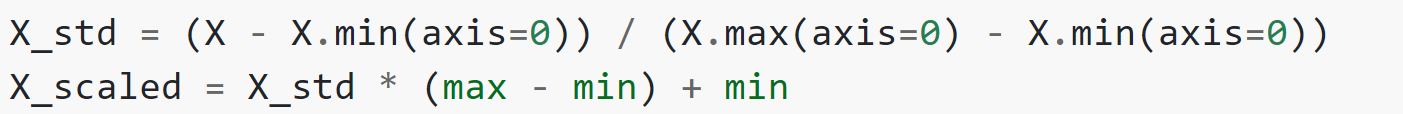

* Here,
  - `X` - Is the actual feature (column) in the data
  - `X.min(axis=0)` - Minimum Value of feature `X`
  - `X.max(axis=0)` - Maximum Value of feature `X`
  - `min` - Minimum value after scaling
  - `max` - Maximum value after scaling
  -`X_scaled` - Value between `min` and `max`

In [73]:
# Importing Scaler from sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating the object of scaler
sc =  MinMaxScaler(feature_range=(0, 1)) # min scaled value = 0, max scaled value = 1

# fit will calculate min and max for each of the 15 features and transform will apply the formula explained above to transform it
X_train = sc.fit_transform(X_train)

In [74]:
# Check the data stored in sc after using fit on train data
print('Minimum values in all the features:-')
print(sc.data_min_)

print()

print('Similarly, Maximum values in all the features:-')
print(sc.data_max_)

print()

print('Check the total features used in scaler:-')
print(sc.n_features_in_)

Minimum values in all the features:-
[ 8.2351005e+00 -5.3826325e+00  1.4728250e+01  1.3205550e+01
  1.2444270e+01  1.2065440e+01  1.1757420e+01  3.0800000e+02
  1.0000000e+00  1.1000000e+01  2.9957800e+17 -4.1360780e-03
  2.6600000e+02  5.1578000e+04  1.0000000e+00]

Similarly, Maximum values in all the features:-
[2.60811189e+02 6.85422654e+01 1.95999000e+01 1.99189700e+01
 2.48020400e+01 2.43618100e+01 2.28269100e+01 1.41200000e+03
 6.00000000e+00 7.68000000e+02 9.46883000e+18 5.35385400e+00
 8.41000000e+03 5.74810000e+04 9.98000000e+02]

Check the total features used in scaler:-
15


In [75]:
# Check if min and max value after scaling train data is in between 0 to 1 or not
print('Train Range after Min Max Scaling:-')
print(X_train.min(), X_train.max())

Train Range after Min Max Scaling:-
0.0 1.0000000000000002


**Key Points:**
- We need to apply the same minimum, maximum values on the `X_test` data to transform it.
- We should not find minimum, maximum for `X_test` to transform it.
- This is how you can avoid the data leakage here.

In [76]:
# Now just apply transform on the X_test
X_test = sc.transform(X_test)

In [77]:
# Now depending on the test data, the scaling might have value below 0 and above 1 as well. Let's check it
print('Test Range after Min Max Scaling:-')
print(X_test.min(), X_test.max())

Test Range after Min Max Scaling:-
-0.3570207219319941 1.3104835004151631


**Key Points:**
* As we can clearly see that minimum and maximum of `X_test` is not 0 and 1 respectively.
* This is what we expect to see when we transform a real/unseen data to the scaling of train data!
* If you had implemented `fit_transform` on `X_test` then it will automatically scale the values of it in between 0 to 1.
* Hence, loose the min and max values of each feature used in the training that should be used on testing too.
- I hope the idea of `fit_transform` and `transform` is clear by now.

## Step 8: Build the Network

* Now that we have prepared our `X_train`, `X_test`, `y_train`, and `y_test` we are all set to build the neural network.
* We are going to use [Keras API](https://keras.io/api/) (tensforflow backend) to build one.
* We shall use [Sequential Class](https://keras.io/api/models/sequential/) to add bunch of layers to create a model.
* We will use [Dense Layer](https://keras.io/api/layers/core_layers/dense/) for Input, Hidden and Output Layers.


In [78]:
# Importing Model, Layer and Tensorflow
from keras.models import Sequential
from keras.layers import Dense

<u>**Neural Network Architecture**</u>           

<img src='https://drive.google.com/uc?id=1QKkR8ADCz3xpbJQd2iS70qwIz8EyqbA2' width=60%>

* As we have 15 features in our data, we must have 15 neurons in the Input layer

* The following Hidden Layers is my own choice along with how many neurons to choose in each layer
  - `Hidden 1 layer has 64 neurons`
  - `Hidden 2 layer has 32 neurons`
  - `Hidden 3 layer has 16 neurons`

* As we have three classes to predict, hence the output layer must have 3 neutrons.

* Note that all of these are created using `Dense Layer` via `Keras`.

* According to research studies,
  - In the hidden layers, activation function will be `relu`
  - In the output layer it will be `softmax` for multiclass classification.



In [79]:
# Fix the seed value for the randomization of the model parameters

# Create the Model with Sequential Class
model = Sequential()

# Add different layers to the model
model.add(Dense(64, input_dim=15, activation='relu')) # Input Layer --> 15 Neurons, 1st Hidden Layer --> 64
model.add(Dense(32, activation='relu'))              # Hidden Layer 2 --> 32 Neurons
model.add(Dense(16, activation='relu'))              # Hidden Layer 3 --> 16 Neurons
model.add(Dense(3, activation='softmax'))            # Output Layer --> 3 Neurons (star, galaxy, quasar)

# Print the Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,683 (14.39 KB)

 Trainable params: 3,683 (14.39 KB)

 Non-trainable params: 0 (0.00 B)

<u>**Parameter Calculations:-**</u>
1. First Hidden Layer:- (15 x 64) Weights + 64 Biases = 1024 Parameters
2. Second Hidden Layer:- (64 x 32) Weights + 32 Biases = 2080 Parameters

So on...

## Step 9: Compile the Model

Here, we provide `optimizer`, `loss function`, and `metrics`.

The one that are widely used based on the research done on them to work in such scenario:-

- `Optimizer` with gradient and momentum concept we shall use `Adam`
- `Loss Function` for Multi-Class Classification is `categorical_crossentropy`
- `Metric` we are choose to evaluate our validation set of data in training will be `accuracy`.

However, you will see why accuracy is not a good metric when it comes to an imbalanced targets like we have in our data (Quasars are very low in amount as compared to other two).

In [80]:
import keras

In [81]:
# Compile --> Optimizer, Loss Function, Evaluation Metrics
model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-3), # As Learning Rate is the hyperparameter, we can change it to see impact on training
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


## Step 10: Train the Model

* There are 7500 images in training set and if we set batch size of 32, how many batches will be created?
* 7500/32 = 234.375 but we cannot have batches in decimals! It can be either of 234 or 235.
* If we use 234 batches then we have total of 32*234 = 7,488 images only!
* If we use 235 batches then we have total of 7,520 images.
* As we have 7500 images, the 20 slots will go empty, so no problem! At least no losing the data.
* We expect the loss the reduce and accuracy to improve as epochs increases.
* At the same time, `training accuracy` and `validation accuracy` must be very close to each other.
* This is to indicate that [overfitting/underfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/) is not seen.
* We are going to run the training for 40 epochs, you can try to later increase the number of epochs and see if results are any better.

<img src='https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png'>

In [82]:
# Train the model
history = model.fit(X_train,                          # Pass X_train data
                    y_train,                          # Pass y_train data
                    validation_data = (X_test, y_test), # Validation Data
                    epochs= 40,                        # Hyperparameter that can be tuned to achieve maximum performance
                    batch_size = 32)                    # Set batch size

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6939 - loss: 0.8059 - val_accuracy: 0.8288 - val_loss: 0.4668
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8661 - loss: 0.3862 - val_accuracy: 0.8912 - val_loss: 0.2956
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9066 - loss: 0.2623 - val_accuracy: 0.9080 - val_loss: 0.2493
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9177 - loss: 0.2349 - val_accuracy: 0.9100 - val_loss: 0.2272
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9241 - loss: 0.2078 - val_accuracy: 0.9248 - val_loss: 0.2174
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9354 - loss: 0.1959 - val_accuracy: 0.8880 - val_loss: 0.3054
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9359 - loss: 0.1945 - val_accuracy: 0.9388 - val_loss: 0.1771
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9475 - loss: 0.1483 - val_accuracy: 0.

**Observations:-**
* Clearly, we can see that model is not overfitting as training and validation accuracy are very close to each other!
* We shall also visualize this for better understanding.
* Just to know that our model is able to get about `98%` accuracy is not really giving us idea about how each category is being predicted.
* Hence, we shall use some other techniques too at the end of the notebook.

**Note:-**
* There might be some difference in the training due to the precision of the machine being used for the training.

## Step 11: Visualize the Training

In [83]:
# See what is history
history

In [84]:
# These are the things you get in the history of training --> Loss and Metrics Data per Epoch
history.history.values()

dict_values([[0.7693333625793457, 0.8787999749183655, 0.9050666689872742, 0.9185333251953125, 0.9240000247955322, 0.9353333115577698, 0.9405333399772644, 0.9489333629608154, 0.9566666483879089, 0.9578666687011719, 0.966533362865448, 0.9641333222389221, 0.9685333371162415, 0.9721333384513855, 0.9751999974250793, 0.974399983882904, 0.9745333194732666, 0.9762666821479797, 0.9774666428565979, 0.9771999716758728, 0.9809333086013794, 0.9783999919891357, 0.9774666428565979, 0.980400025844574, 0.9802666902542114, 0.981333315372467, 0.9787999987602234, 0.980400025844574, 0.9779999852180481, 0.9796000123023987, 0.9819999933242798, 0.9793333411216736, 0.9810666441917419, 0.9815999865531921, 0.9819999933242798, 0.9818666577339172, 0.9819999933242798, 0.9796000123023987, 0.9826666712760925, 0.9819999933242798], [0.6493408679962158, 0.34484973549842834, 0.2680681347846985, 0.2332538515329361, 0.2111530601978302, 0.1910054236650467, 0.1763819456100464, 0.15726310014724731, 0.13951726257801056, 0.1324

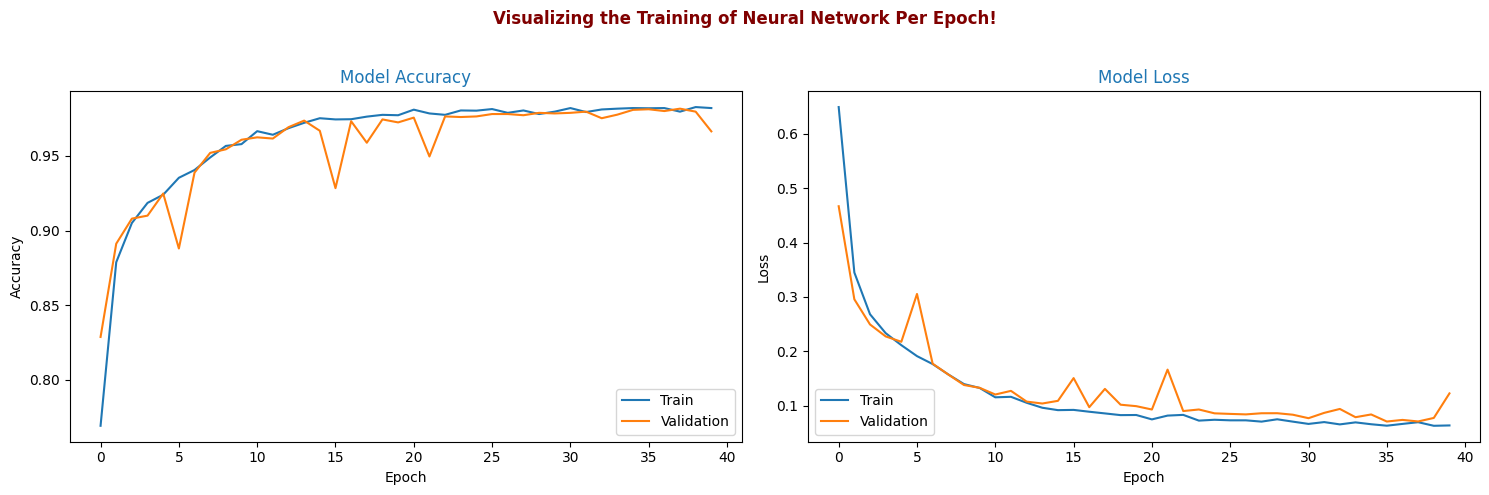

In [85]:
# Add Figursize and Title to the subplot
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Training of Neural Network Per Epoch!\n', weight='bold', color='maroon')

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy', color='tab:blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss', color='tab:blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

plt.tight_layout()

plt.savefig('ModelTraining.png')
plt.show()

**Observations:-**
- As loss decreases, accuracy increases and vice-versa is also seen to be true.
- We cannot see much of overfitting, little bit is fine.
- Now we can go ahead and test the brain we have crafted for this project.

## Step 12: Test the Model on Test Data and Evaluate its Performance

* Note that unseen data if passed to model to predict, it must undergo the same preprocessing as the training data.
* We have already done that step above so no need to repeat it.
* However, if you have a new data to try out on our model, that must go under scaling using `esc.transform(unseen_data)`.
* We use `predict` on model to get the output in terms of probability here as activation on last layer was `softmax`.
* It uses the optimal weights and bias got during the trianing to make the predictions.

In [86]:
# Get the precdiction output on X_test data
y_predict = model.predict(X_test) # REMEMBER TO APPLY SAME PREPROCESSING STEPS YOU USED FOR TRAINING

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
# Check the probabilities of the classes
y_predict

array([[9.9979138e-01, 1.7656227e-04, 3.2131389e-05],
       [1.6625143e-03, 9.9833757e-01, 0.0000000e+00],
       [4.3946588e-01, 2.4464837e-04, 5.6028944e-01],
       ...,
       [9.9922490e-01, 2.9653482e-05, 7.4545189e-04],
       [9.3549455e-04, 9.9906451e-01, 0.0000000e+00],
       [9.9817455e-01, 1.8181454e-03, 7.2358903e-06]], dtype=float32)

**Key Points:-**
* The sum of each of these 3 values in every row will be equal to 1.
* The class on index with maximum probability value is the class predicted by our model.
* To convert these probabilities back to original class, we use `esc.inverse_transform`.

In [88]:
# Convert y_test (one hot vectors) and y_predict (softmax probabilitites) into the names of classes (Galaxy, Quasar, Star)
y_test_class = enc.inverse_transform(y_test)
y_predict_class = enc.inverse_transform(y_predict)

In [89]:
# Cross check if it worked using first two data in both the outputs
print('Acutal Classes:-')
print(y_test_class[:5])

print()

print('Predicted Classes by our Model')
print(y_predict_class[:5])

Acutal Classes:-
[['GALAXY']
 ['QSO']
 ['GALAXY']
 ['GALAXY']
 ['STAR']]

Predicted Classes by our Model
[['GALAXY']
 ['QSO']
 ['STAR']
 ['GALAXY']
 ['STAR']]


**Observations:-**
* It is working fine!
* Now it is time to see how many galaxies were correctly and incorrectly predicted by our model.
* Same for Stars and Quasars...
* We can easily do it using [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from `sklearn`.

In [90]:
# Import Confusion Matrix from Sklearn
from sklearn.metrics import confusion_matrix

# It takes actual and predicted outputs to create confusion matrix
cm = confusion_matrix(y_test_class, y_predict_class)

In [91]:
cm

array([[1179,    2,   65],
       [  15,  227,    0],
       [   2,    0, 1010]])

* This ain't making much sense, so let's decorate this matrix with our visualization skills!

In [92]:
# Seaborn is yet another visualization library built on top of Matplotlib
import seaborn as sns

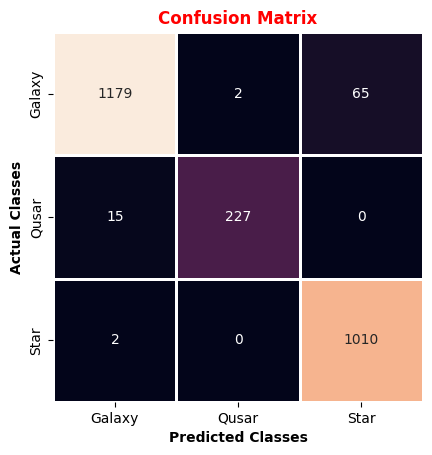

In [93]:
# Prepare xticklabels and yticklabels
labels = ['Galaxy', 'Qusar', 'Star']

# Using seaborn's heatmap to visualize the matrix with a lot of input arguments
sns.heatmap(cm, annot=True, cbar=False, fmt='d',
            xticklabels=labels, yticklabels=labels,
            square=True, linewidth=2) # annotation, square, fmt, cbar, linewidth, xticklabels, yticklabels

# Add Customization
plt.title('Confusion Matrix', weight='bold', color='red')
plt.xlabel('Predicted Classes', weight='bold')
plt.ylabel('Actual Classes', weight='bold')

# Save the figure and display it
plt.savefig('ConfusionMatrix.png')
plt.show()

**Observation:-**
- Clearly, the missclassification of a Galaxy as a Star is high in ratio as compared to missclassifying a Glaxy with a Quasar.
- Similarly, more missclassification of a Star as a Galaxy than as a Quasar.
- This supports our hypothesis of model won't be able to generalize well between these two classes.
- To my surpise, Quasars are performing very well inspite of being the least in quantity.
- This is really a good model, surely we can improve it further too with some advanced techniques, but for now it is just THE BEST!

**Important:-**
* Your output may change, due to multiple reasons!
* One of them being not seeding the random numbers.
* Second of the most popular reason is to add randomness in our notebook via some third part library.
* Best way is to cross validate by running the models like 20-30 times and then take the average...

## Step 13: Save the Trained Model as h5 file
* Assume you want to create a web application based on this now.
* You will need trained model parameters to predict in the app.
* Hence, it is useful to save the trained model so that it can be used in the backend of your web app.

In [94]:
# Check the file storage of colab, it will be saved there once you run this code

from joblib import dump
model.save('model.h5')
dump(enc, 'encoder.joblib')
dump(sc, 'min_max_scaler.joblib')



['min_max_scaler.joblib']

## End Notes
* You can download the saved model and create an API for it if required.
* Same steps as the API how we did for star type API.

---